# Ví dụ 1

In [10]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(10)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 100
X0 = np.random.multivariate_normal(means[0], cov, N) # class 1
X1 = np.random.multivariate_normal(means[1], cov, N) # class -1
X = np.concatenate((X0.T, X1.T), axis = 1) # all data
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # labels
print(X0.shape)
print(X1.shape)
print(y.shape)

(100, 2)
(100, 2)
(1, 200)


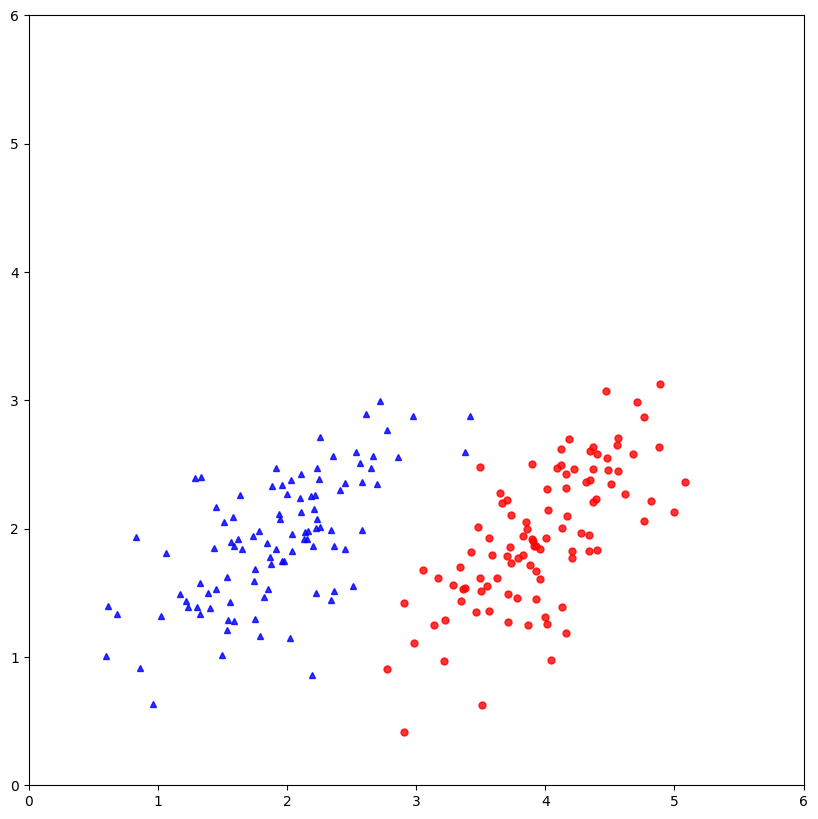

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
ani = plt.cla()
#plot points
ani = plt.plot(X0.T[0, :], X0.T[1, :], 'b^', markersize = 5, alpha = .8)
ani = plt.plot(X1.T[0, :], X1.T[1, :], 'ro', markersize = 5, alpha = .8)
ani = plt.axis([0 , 6, 0, 6])
plt.show()

In [12]:
from cvxopt import matrix, solvers
# build P ~ K
V = np.concatenate((X0.T, -X1.T), axis = 1)
P = matrix(V.T.dot(V)) # P ~ K in slide see definition of V, K near eq (8)
q = matrix(-np.ones((2*N, 1))) # all-one vector
print(P.size)
print(q.size)
# build A, b, G, h
G = matrix(-np.eye(2*N)) # for all lambda_n >= 0! note that we solve -g(lambda) -> min
h = matrix(np.zeros((2*N, 1)))
A = matrix(y) # the equality constrain is actually y^T lambda = 0
b = matrix(np.zeros((1, 1)))
solvers.options['show_progress'] = False
sol = solvers.qp(P, q, G, h, A, b)
l = np.array(sol['x']) # lambda
print('lambda = ')
print(l.T)

(200, 200)
(200, 1)
lambda = 
[[6.43830372e-10 4.72988123e-10 6.96301261e-10 5.79332567e-10
  5.85394979e-10 5.88997480e-10 4.89184241e-10 5.67664894e-10
  4.93959294e-10 8.11159682e-10 7.35998382e+01 5.84752419e-10
  6.33981206e-10 5.70452608e-10 5.33265242e-10 6.21992621e-10
  6.30547706e-10 6.42898737e-10 6.23309373e-10 7.19237900e-10
  6.37162151e-10 5.62750934e-10 5.43352984e-10 5.34317125e-10
  6.12473191e-10 5.54489279e-10 5.15178968e-10 6.11949009e-10
  7.11337568e-10 6.01640553e-10 6.16174828e-10 7.08582794e-10
  6.28907978e-10 9.47883550e-10 5.60470453e-10 5.73546044e-10
  5.40206464e-10 5.84839274e-10 4.52413498e-10 5.71685468e-10
  6.69868839e-10 4.47707836e-10 3.99526097e-10 5.50379371e-10
  8.79639914e-10 6.28698683e-10 6.73190935e-10 6.03403938e-10
  5.36740042e-10 1.22567795e-09 8.50987129e-10 4.93131967e-10
  6.05327442e-10 5.32588255e-10 7.14356409e-10 6.36992251e-10
  7.63436068e-10 5.89166800e-10 5.36104164e-10 9.45023473e-10
  6.67949637e-10 6.12129203e-10 6.464935

In [13]:
epsilon = 1e-6 # just a small number, greater than 1e-9, to filter values of lambda
S = np.where(l > epsilon)[0]
VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
lS = l[S]
# calculate w and b
w = VS.dot(lS)
w0 = np.mean(yS.T - w.T.dot(XS))
print('W = ', w.T)
print('W0 = ', w0)

W =  [[-10.10601344   6.8886009 ]]
W0 =  17.24141785933487


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


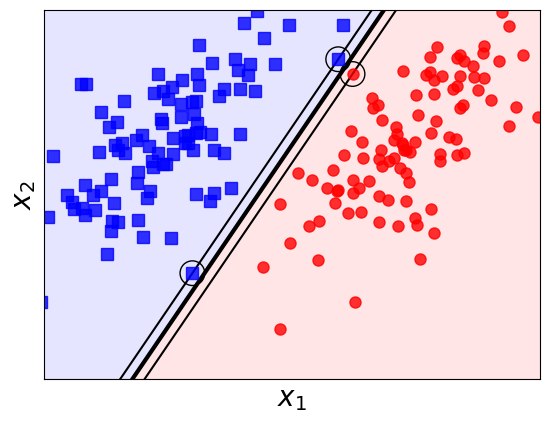

In [14]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('/home/vitquay1708/Study_Space/ml/week_12/svm4hardmargin.pdf') as pdf:
  # draw
  # plot points
  fig, ax = plt.subplots()
  x1 = np.arange(-10, 10, 0.1)
  y1 = -w[0, 0]/w[1, 0]*x1 - w0/w[1, 0]
  y2 = -w[0, 0]/w[1, 0]*x1 - (w0-1)/w[1, 0]
  y3 = -w[0, 0]/w[1, 0]*x1 - (w0+1)/w[1, 0]
  plt.plot(x1, y1, 'k', linewidth = 3)
  plt.plot(x1, y2, 'k')
  plt.plot(x1, y3, 'k')
  y4 = 10*x1
  plt.plot(x1, y1, 'k')
  plt.fill_between(x1, y1, color='red', alpha=0.1)
  plt.fill_between(x1, y1, y4, color = 'blue', alpha = 0.1)
  plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
  plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
  plt.axis('equal')
  plt.ylim(0, 3)
  plt.xlim(2, 4)
  # hide tikcs
  cur_axes = plt.gca()
  cur_axes.axes.get_xaxis().set_ticks([])
  cur_axes.axes.get_yaxis().set_ticks([])
  # add circles around support vectors
  for m in S:
    circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
    ax.add_artist(circle)

  plt.xlabel('$x_1$', fontsize = 20)
  plt.ylabel('$x_2$', fontsize = 20)
  # plt.savefig('svm4.png', bbox_inches='tight', dpi = 300)
  # pdf.savefig()
  plt.show()

In [15]:
from sklearn.svm import SVC
# Copy and put code for generate data here
y1 = y.reshape((2*N,))
X1 = X.T # each sample is one row
clf = SVC(kernel = 'linear', C = 1e5) # just a big number
# if C is small, method will be “SoftMagin SVM”,
# if C is large enough, method is near to hard margin
clf.fit(X1, y1)
w = clf.coef_
w0 = clf.intercept_
print('w = ', w)
print('W0 = ', w0)
print(X1.shape)
print(w.shape)

w =  [[-10.10242378   6.88613861]]
W0 =  [17.23542499]
(200, 2)
(1, 2)


## Bài thực hành 1:

In [16]:
def predict(X, w, b):
  y_pred = np.dot(X, w.T) + np.full(1, w0)
  
  return np.sign(y_pred)

In [17]:
y_pred = predict(X1, w, w0)
print(y_pred)

[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f'Accuracy:{accuracy_score(y_true=y1, y_pred=y_pred)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_true=y1, y_pred=y_pred)}')

Accuracy:1.0
Confusion Matrix: 
 [[100   0]
 [  0 100]]


# Bài thực hành 2:

In [19]:
from sklearn import datasets
cancer_data = datasets.load_breast_cancer()
# show to test record 5th
print(cancer_data.data[5])
print(cancer_data.data.shape)
#target set
print(cancer_data.target)
from sklearn.model_selection import train_test_split
cancer_data = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data,cancer_data.target, test_size=0.3,random_state=109)
print(cancer_data.data.shape)

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 

In [20]:
N = X_train.shape[0]
X_class0 = X_train[y_train == 0]
X_class1 = X_train[y_train == 1]
y_train_svm = np.array([-1 if y == 0 else 1 for y in y_train]).reshape(1, -1)
print(X_class1.shape)
print(X_class0.shape)
print(y_train_svm)
print(y_train_svm.shape)

(249, 30)
(149, 30)
[[-1  1  1  1  1  1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1  1  1  1
   1 -1 -1  1 -1  1  1  1  1  1 -1  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1  1
  -1  1 -1  1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1
   1 -1  1  1  1  1 -1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1 -1
   1  1  1 -1  1  1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1  1 -1  1  1  1 -1
  -1  1  1  1 -1  1 -1 -1 -1  1 -1  1  1  1 -1  1 -1  1 -1 -1  1  1  1  1
  -1 -1  1  1  1  1  1 -1  1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1 -1 -1
   1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1
   1 -1 -1  1 -1  1  1  1 -1 -1  1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1
   1  1 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1 -1 -1  1  1  1 -1  1 -1  1  1
   1  1  1 -1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1
  -1  1  1 -1  1 -1  1 -1  1 -1  1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1  1
  -1  1  1  1 -1  1  1  1 -1  1 -1 -1  1  1  1 -1  1 -1  1 -1 -1 -1 -1  1
   1 -1 -1  1 -1  

In [21]:
V = np.concatenate((X_class0.T, -X_class1.T), axis = 1)
P = matrix(V.T.dot(V)) # P ~ K in slide see definition of V, K near eq (8)
q = matrix(-np.ones((N, 1))) # all-one vector
# build A, b, G, h
G = matrix(-np.eye(N)) # for all lambda_n >= 0! note that we solve -g(lambda) -> min
h = matrix(np.zeros((N, 1)))
A = matrix(y_train_svm, tc = 'd') # the equality constrain is actually y^T lambda = 0
print(A.size[1])
print(A.typecode)
print(q.size[0])
b = matrix(np.zeros((1, 1)))
solvers.options['show_progress'] = False
sol = solvers.qp(P, q, G, h, A, b)
l = np.array(sol['x']) # lambda
print('lambda = ')
print(l.T)

398
d
398
lambda = 
[[ 1.63175007e+004  8.96477806e-178  6.68859187e-177 -7.25499028e-178
   1.99480331e-177  3.77196831e-177  9.95896833e-178  8.23951421e-178
   1.21817787e+005 -1.05498405e-177  2.78945392e-177 -1.55333269e-177
   4.91895097e-169 -3.08993134e-177  4.03749109e-178 -1.39011075e-177
  -9.12057165e-178  4.55051326e-177  1.12540221e-176 -1.87602881e-177
   5.51438532e-177  4.10213892e-176  6.23380010e-177 -1.94066548e-177
  -1.63546423e-177  2.19461911e-176  1.05019350e-176  1.98770806e-177
  -4.00389465e-177 -1.78742291e-177 -1.37865080e-177  5.79004962e+003
   5.39574780e-177 -3.67486129e-178  5.12683312e-178  3.56261260e-177
   1.76513098e-176 -1.65856113e-177  1.61977441e-177  3.85434196e-177
   3.00604012e-177  2.37366557e-176  1.37347725e-176 -6.32444823e-178
   1.31620291e-177  1.25277545e-177 -2.82953383e-177  3.83886001e-176
   3.51008397e-177 -1.01889873e-177  3.42341368e+004 -1.29297957e-177
   5.88936781e+003 -1.33316667e-177 -2.87609471e-177  3.19307128e+004


In [22]:
epsilon = 1e-6 # just a small number, greater than 1e-9, to filter values of lambda
S = np.where(l > epsilon)[0]
VS = V[:, S]
XS = X_train[S, :]
yS = y_train[S]
lS = l[S]
# calculate w and b
w = VS.dot(lS)
print(yS.shape)
print(XS.shape)
print(w.shape)
w0 = np.mean(yS.T - XS.dot(w))
print('W = ', w.T)
print('W0 = ', w0)

(26,)
(26, 30)
(30, 1)
W =  [[-6.96406558e+00  4.30983263e-01  1.16707174e+00 -3.72612849e-02
   2.02310944e+02 -7.20318656e+01  5.80659525e+01  5.15550767e-01
  -1.94006289e+02  2.50667340e+02  7.97714513e+01 -4.51154665e+00
  -4.23348877e+00  1.30166401e-01 -1.39463481e+02  3.31440213e+02
  -3.94365884e+02  3.25296391e+02 -1.22144630e+02  2.67765485e+01
  -1.63218736e+01  1.00137415e+00  4.66692869e-01  1.66229516e-01
  -6.00671046e+01 -1.15459892e+02  5.99837155e+01  2.39311307e+02
   1.36356425e+02  3.97616252e+01]]
W0 =  -6.300206273357455


In [23]:
y_pred = np.sign(np.dot(X_test, w) + np.full(1, w0)) * -1
print(y_pred.reshape(1, -1))
y_test_svm = np.array([-1 if y == 0 else 1 for y in y_test])
print(y_test_svm)
print(y_test)

[[ 1.  1. -1. -1.  1. -1.  1.  1.  1. -1. -1. -1.  1. -1. -1.  1. -1. -1.
   1. -1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.
   1. -1.  1.  1. -1.  1. -1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1.
   1. -1.  1.  1.  1. -1. -1.  1. -1.  1. -1. -1.  1.  1.  1.  1. -1.  1.
   1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.
  -1.  1.  1. -1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1. -1.  1.
  -1.  1.  1. -1.  1.  1. -1. -1. -1.  1. -1.  1.  1.  1.  1.  1. -1.  1.
  -1.  1. -1.  1. -1. -1. -1.  1. -1.  1.  1. -1.  1.  1.  1. -1.  1.  1.
  -1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1.  1. -1.  1.  1.  1.
   1.  1.  1.  1.  1. -1.  1.  1.  1.]]
[ 1  1 -1 -1  1 -1  1  1  1 -1 -1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1 -1
  1  1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1  1 -1  1 -1  1  1  1 -1  1
 -1 -1  1  1 -1  1  1 -1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1  1 -1  1
  1  1 -1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1  1 -1  1  1
  

In [24]:
print(f'Accuracy:{accuracy_score(y_true=y_test_svm, y_pred=y_pred)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_true=y_test_svm, y_pred=y_pred)}')

Accuracy:0.9707602339181286
Confusion Matrix: 
 [[ 60   3]
 [  2 106]]


In [25]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'Accuracy:{accuracy_score(y_true=y_test, y_pred=y_pred)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_true=y_test, y_pred=y_pred)}')

Accuracy:0.9649122807017544
Confusion Matrix: 
 [[ 61   2]
 [  4 104]]


# Ví dụ 2:

In [26]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC

In [27]:
df =  pd.read_csv('/home/vitquay1708/Study_Space/ml/week_12/data/sonar.all-data.csv', header = None)
X = df.iloc[:, :60].to_numpy()
y_raw = df.iloc[:, 60].to_numpy()
y = np.array([1 if label == 'M' else -1 for label in y_raw])
print(y)
print(X)


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
[[0.02   0.0371 0.0428 ... 0.0084 0.009  0.0032]
 [0.0453 0.0523 0.0843 ... 0.0049 0.0052 0.0044]
 [0.0262 0.0582 0.1099 ... 0.0164 0.0095 0.0078]
 ...
 [0.0522 0.0437 0.018  ... 0.0138 0.0077 0.0031]
 [0.0303 0.0353 0.049  ... 0.0079 0.0036 0.0048]
 [0.026  0.0363 0.0136 ... 0.0036 0.0061 0.0115]]


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, stratify=y, random_state=42)

In [33]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_true=y_test, y_pred=y_pred)}')

Accuracy: 0.8214285714285714
Confusion Matrix: 
 [[33  6]
 [ 9 36]]
